In [104]:
words = open('harry_potter_text.txt', 'r').read().split()

In [105]:
words[:10]

['preprocessed_text',
 'THE',
 'BOY',
 'WHO',
 'LIVED',
 'Mr',
 'Mrs',
 'Dursley',
 'number',
 'four']

In [106]:
words.pop(0)

'preprocessed_text'

In [107]:
import re

def remove_special_characters_and_lowercase(lst):
    cleaned_list = []
    for item in lst:

        cleaned_item = re.sub(r'[^A-Za-z\s]', '', item)

        cleaned_list.append(cleaned_item.lower().strip())
    return cleaned_list

words = remove_special_characters_and_lowercase(words)


In [108]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('d', '<E>'), 110595),
 (('e', '<E>'), 99287),
 (('<S>', 's'), 84284),
 (('i', 'n'), 75282),
 (('s', '<E>'), 68557),
 (('t', '<E>'), 65941),
 (('y', '<E>'), 64363),
 (('e', 'd'), 63778),
 (('<S>', 'h'), 58968),
 (('e', 'r'), 53259),
 (('a', 'r'), 53195),
 (('n', 'g'), 52455),
 (('<S>', 't'), 46913),
 (('g', '<E>'), 46693),
 (('r', 'e'), 46112),
 (('h', 'e'), 44678),
 (('o', 'n'), 42338),
 (('h', 'a'), 38176),
 (('<S>', 'w'), 36839),
 (('l', 'e'), 36714),
 (('<S>', 'c'), 36543),
 (('r', '<E>'), 36154),
 (('t', 'h'), 35202),
 (('e', 'a'), 33862),
 (('o', 'u'), 33840),
 (('n', '<E>'), 33630),
 (('s', 't'), 32772),
 (('t', 'e'), 30804),
 (('<S>', 'b'), 30638),
 (('<S>', 'm'), 30531),
 (('<S>', 'l'), 30329),
 (('<S>', 'd'), 30228),
 (('e', 'n'), 30200),
 (('a', 'n'), 30154),
 (('<S>', 'a'), 30079),
 (('o', 'r'), 29969),
 (('<S>', 'f'), 29649),
 (('e', 's'), 29630),
 (('n', 'e'), 29281),
 (('<S>', 'p'), 28859),
 (('n', 't'), 28678),
 (('r', 'o'), 28375),
 (('i', 'd'), 27852),
 (('<S>', 'r'

In [109]:
import torch

In [117]:
N = torch.zeros((27, 27), dtype = torch.int32)

In [123]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [126]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

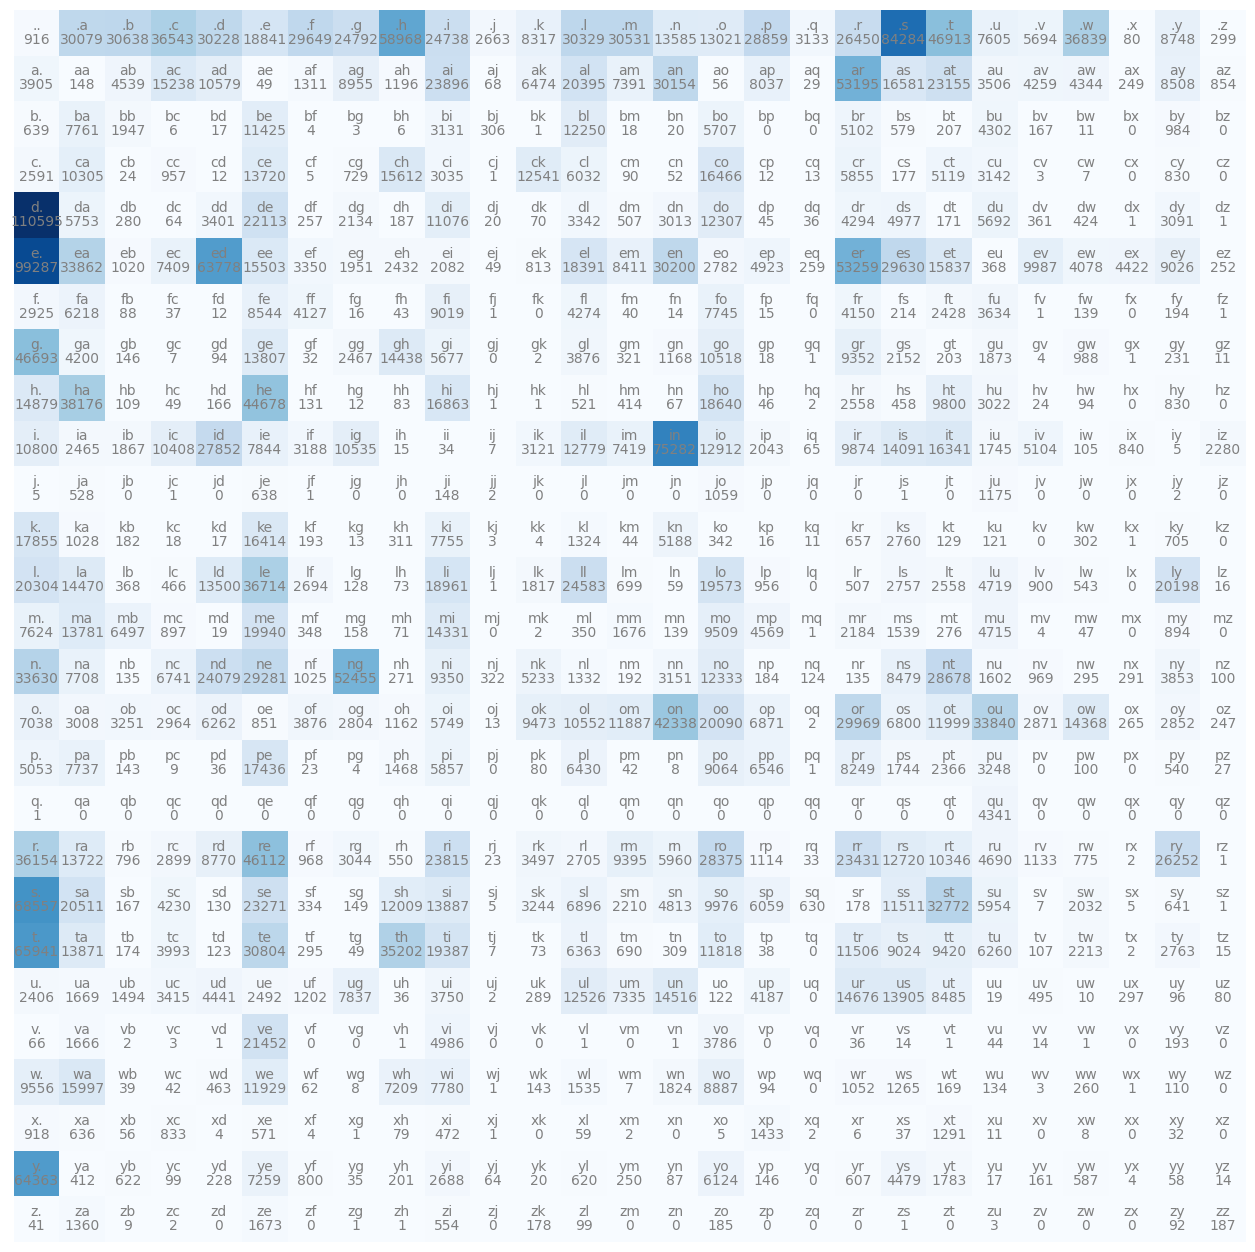

In [127]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [129]:
p = N[0].float()
p = p / p.sum()
p

tensor([1.4477e-03, 4.7538e-02, 4.8421e-02, 5.7753e-02, 4.7773e-02, 2.9777e-02,
        4.6858e-02, 3.9182e-02, 9.3194e-02, 3.9097e-02, 4.2087e-03, 1.3144e-02,
        4.7933e-02, 4.8252e-02, 2.1470e-02, 2.0579e-02, 4.5609e-02, 4.9515e-03,
        4.1802e-02, 1.3320e-01, 7.4142e-02, 1.2019e-02, 8.9989e-03, 5.8221e-02,
        1.2643e-04, 1.3826e-02, 4.7255e-04])

In [141]:
g = torch.Generator().manual_seed(69)
p = torch.rand(3, generator = g)
p = p/p.sum()
p

tensor([0.4757, 0.4555, 0.0687])

In [161]:
g = torch.Generator().manual_seed(69)

for i in range(5):

  out = []
  ix = 0
  while True:
    p = N[ix].float()
    p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

facyseckefagotesions.
ptthe.
iaury.
hiblingoti.
gg.


In [147]:
p.shape

torch.Size([27])

In [172]:
P = (N+1).float()
P = P / P.sum( 1, keepdim = True)

In [173]:
g = torch.Generator().manual_seed(69)

for i in range(5):

  out = []
  ix = 0
  while True:

    p = P[ix]

   # p = N[ix].float()
   # p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

facyseckefagotesions.
ptthe.
iaury.
hiblingoti.
gg.


In [174]:
log_likelihood = 0.0
count = 0
for w in words[:5]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    count += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')


nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/count}')

.t: 0.0741 -2.6018
th: 0.1527 -1.8790
he: 0.2946 -1.2221
e.: 0.2345 -1.4503
.b: 0.0484 -3.0278
bo: 0.1045 -2.2585
oy: 0.0118 -4.4382
y.: 0.7015 -0.3546
.w: 0.0582 -2.8435
wh: 0.1051 -2.2528
ho: 0.1229 -2.0962
o.: 0.0292 -3.5351
.l: 0.0479 -3.0380
li: 0.1011 -2.2918
iv: 0.0214 -3.8464
ve: 0.6643 -0.4090
ed: 0.1506 -1.8929
d.: 0.5694 -0.5632
.m: 0.0483 -3.0313
mr: 0.0244 -3.7137
r.: 0.1353 -2.0006
log_likelihood=tensor(-48.7469)
nll=tensor(48.7469)
2.3212807178497314


In [180]:
#Bigrams predicted

g = torch.Generator().manual_seed(52)

for i in range(10):

  out = []
  ix = 0
  while True:

    p = P[ix]

   # p = N[ix].float()
   # p = p/p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

foosceay.
achecor.
surerpobuld.
w.
btlovot.
llextre.
ingieknamade.
dut.
apl.
le.


In [176]:
# Probability of a word("martin" in this case) to be predicted by this model

for w in ['martin']:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    count += 1
    print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')


nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/count}')

.m: 0.0483 -3.0313
ma: 0.1538 -1.8720
ar: 0.2069 -1.5755
rt: 0.0387 -3.2517
ti: 0.0841 -2.4755
in: 0.3149 -1.1554
n.: 0.1450 -1.9312
log_likelihood=tensor(-64.0395)
nll=tensor(64.0395)
2.287123203277588
